# Proyecto Integrador

## Exploratory Data Analysis

##### A continuación importamos editores necesarios y útiles para el proyecto:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importación de nuestro dataset (usando la ruta de nuestro archivo, ya que no se ubican en la misma carpeta) y una primera exploración de los datos utilizando df.head()

In [4]:
df = pd.read_csv(r'C:\Users\feder\Documents\Data Science\Prácticas Entregables\ProyectoM1_FedericoCeballosTorres\data\base_datos_restaurantes_USA_v2.csv')
df.head() # para visualizar las primeras filas del DataFrame y entender su estructura

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


In [5]:
# también para visualizar las primeras filas del DataFrame y entender su estructura
df.info()
df.describe(include='all')
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

np.int64(0)

###### La solicitud anterior nos devolvió información esencial de nuestra base de datos: La cantidad de filas (entries) 30000, entre el 0 y el 29999. Un total de 17 columnas, el nombre de cada columna, la cantidad de datos por columna, la cantidad de datos no-nulos y el tipo de datos que almacena cada columna. En las columnas cuyo valor de dato no-nulo es inferior a 30000, significa que el restante, son datos nulos. Columnas con datos no-nulos menor al 100 % (menos de 30000): / 'edad': 29899 // 'promedio_gasto_comida': 29855 // 'preferencias_alimenticias': 28597 // 'telefono_contacto': 14834 // 'correo_electronico': 14928

##### Le solicito el índice de columnas y el tipo de dato por columna para luego hacer una descripción de cada una de ellas:

In [6]:
df.columns
df.dtypes

id_persona                     int64
nombre                        object
apellido                      object
edad                         float64
genero                        object
ciudad_residencia             object
estrato_socioeconomico        object
frecuencia_visita              int64
promedio_gasto_comida        float64
ocio                          object
consume_licor                 object
preferencias_alimenticias     object
membresia_premium             object
telefono_contacto             object
correo_electronico            object
tipo_de_pago_mas_usado        object
ingresos_mensuales             int64
dtype: object

##### Descripción de columnas:
###### Donde: 'id_persona': es un valor que identifica de manera unívoca a cada cliente. 'nombre': nombre del cliente. 'apellido': apellido del cliente. 'edad': edad del cliente. 'genero': género del cliente. 'ciudad_residencia': donde vive el cliente al momento de obtener el dato. 'estrato_socioeconomico': pertenencia a x grupo de la escala socioeconómica de acuerdo a los ingresos declarados al moemento de obtener los datos. 'frecuencia_visita': la habitualidad con la que el cliente utiliza nuestros servicios. 'promedio_gasto_comida': dato estadístico que suma todos los gastos del cliente individuales y se dividie por la cantidad de veces que realizó visitas a nuestro local. 'ocio',: si el cliente utiliza nuestro local con un propósito ocioso/recreativo o no. 'consume_licor': nos indica si nuestro cliente es consumidor de bebidas alcoholicas o no. 'preferencias_alimenticias': nos indica cuál es la preferencia alimenticia del cliente (por ej si tiene exclusiones como alimentos de origen animal o preferencias tales como los alimentos de mar). 'membresia_premium': indica por sí o por no si el cliente es miembro premium de nuestra cadena de locales. 'telefono_contacto': teléfono principal del cliente. 'correo_electronico': correo electrónico principal del cliente. 'tipo_de_pago_mas_usado': el medio que utiliza más frecuentemente. 'ingresos_mensuales': el nivel de ingresos del cliente.
###### La solicitud anterior también nos brinda información acerca del tipo de dato contenido en cada una de las 17 columnas: -'object' (incluye strings, bools y mezcla de categorías): nombre, apellido, genero, ciudad_residencia, estrato_socioeconomico, ocio, consume_licor, preferencias_alimenticias, membresia_premium, telefono_contacto, correo_electronico y tipo_de_pago_mas_usado. -'int64' (enteros): id_persona, frecuencia_visita e ingresos_mensuales. -'float64' (decimales): edad y promedio_gasto_comida.

##### A continuación le solicito la lista de ciudades, para elegir una de ellas:

In [7]:
df['ciudad_residencia'].describe

<bound method NDFrame.describe of 0            Miami
1           Denver
2           Denver
3           Boston
4        San Diego
           ...    
29995      Houston
29996       Denver
29997    San Diego
29998      Chicago
29999      Chicago
Name: ciudad_residencia, Length: 30000, dtype: object>

##### Escogí la ciudad de San Diego, California, EE.UU. Los criterios para elegirla fueron los siguientes: -que esta ciudad contuviera una cantidad razonable de elementos (entries) como para que la muestra sea razonablemente representativa del universo que compone la ciudad. -que los datos de cada columna, fuesen suficientemente válidos (en niveles porcentuales bajos de datos nulos, duplicados y erróneos).

##### Realizo una copia del dataframe y la llamo 'df_sandiego', teniendo en cuenta que en caso de necesitar la tolalidad de las ciudades, voy a tener que convocar al dataframe llamado 'df'.

In [8]:
df_sandiego = df[df['ciudad_residencia'] == 'San Diego'].copy()

##### A continuación quiero saber la forma de mi tabla (filas, columnas)

In [9]:
df_sandiego.shape

(3075, 17)

##### Luego busco información de mi dataframe, en particular acerca de cuáles son las columnas totales, para definir cuáles voy a eliminar. El criterio de eliminación de las columnas es que estas no sean relevantes para nuestro estudio:
###### Otro de los criterios será eliminar columnas que estén contaminadas con una gran proporción de datos nulos, duplicado y/o erróneos. Procederemos a la investigación y eliminación de estas columnas, si correspondiera, más adelante.

In [10]:
df_sandiego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3075 entries, 4 to 29997
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 3075 non-null   int64  
 1   nombre                     3075 non-null   object 
 2   apellido                   3075 non-null   object 
 3   edad                       3068 non-null   float64
 4   genero                     3075 non-null   object 
 5   ciudad_residencia          3075 non-null   object 
 6   estrato_socioeconomico     3075 non-null   object 
 7   frecuencia_visita          3075 non-null   int64  
 8   promedio_gasto_comida      3061 non-null   float64
 9   ocio                       3075 non-null   object 
 10  consume_licor              3075 non-null   object 
 11  preferencias_alimenticias  2885 non-null   object 
 12  membresia_premium          3075 non-null   object 
 13  telefono_contacto          1501 non-null   object 
 

##### Decido eliminar tres columnas por su baja o nula relevancia al estudio: -id_persona // -nombre // -apellido:

In [11]:
df_sandiego.drop(columns=['id_persona','nombre','apellido'], inplace=True)

##### A continuación, necesito verificar la eliminación de nuestras columnas, primero a través de un 'shape' que me devuelva 3 columnas menos (esperable 17-3= 14):

In [12]:
df_sandiego.shape

(3075, 14)

###### Efectivamente recibimos 14 columnas.

##### Luego, necesito ver mi df y confirmar que las columnas eliminadas sean las solicitadas previamente:

In [13]:
df_sandiego.columns

Index(['edad', 'genero', 'ciudad_residencia', 'estrato_socioeconomico',
       'frecuencia_visita', 'promedio_gasto_comida', 'ocio', 'consume_licor',
       'preferencias_alimenticias', 'membresia_premium', 'telefono_contacto',
       'correo_electronico', 'tipo_de_pago_mas_usado', 'ingresos_mensuales'],
      dtype='object')

###### Confirmamos la eliminación requerida.

##### Procedo a la búqueda de datos duplicados:

In [14]:
duplicados = df_sandiego.duplicated().sum()
duplicados

np.int64(0)

###### Del resultado anterior se puede interpretar la ausencia de números duplicados.

### A continuación voy a proceder a buscar los datos erróneos:

##### Primero datos imposibles o casi imposibles que por su frecuencia se vuelven irrelevantes, como edades menores a 0 o mayores de 120, etc.

In [15]:
df_sandiego[np.where((df_sandiego['edad'] < 0) | (df_sandiego['edad'] > 120), True, False)]

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
1250,300.0,Femenino,San Diego,Muy Alto,10,36.88,No,No,Carnes,Sí,NaN,david82@example.net,Tarjeta,9729
1344,300.0,Masculino,San Diego,Medio,4,8.64,No,No,Mariscos,No,NaN,deniseshepherd@example.com,App,2667
1435,300.0,Femenino,San Diego,Medio,3,29.89,No,No,Mariscos,No,452.747.5071x297,NaN,Efectivo,2781
5316,-5.0,Femenino,San Diego,Muy Alto,8,41.29,No,No,Vegetariano,Sí,NaN,NaN,App,13750
8519,300.0,Femenino,San Diego,Bajo,3,19.88,No,Sí,Otro,No,+1-482-593-9958x590,NaN,Tarjeta,1199
9820,300.0,Femenino,San Diego,Muy Alto,6,101.35,No,Sí,Vegetariano,Sí,NaN,NaN,App,16777
11250,-5.0,Masculino,San Diego,Alto,5,41.17,Sí,No,Vegetariano,Sí,NaN,crystalblake@example.net,App,6769
14767,300.0,Masculino,San Diego,Medio,5,12.84,Sí,Sí,Vegano,No,NaN,NaN,Efectivo,1851
15189,-5.0,Masculino,San Diego,Medio,5,23.97,Sí,Sí,Otro,No,NaN,amanda31@example.org,Efectivo,1733
18387,300.0,Masculino,San Diego,Muy Alto,5,42.93,No,No,Carnes,Sí,NaN,banderson@example.com,Tarjeta,9807


##### Ingresos mensuales negativos

In [16]:
df_sandiego[np.where(df_sandiego['ingresos_mensuales'] < 0, True, False)] # ingresos mensuales negativos

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales


##### Frecuencia de visita negativa

In [17]:
df_sandiego[np.where(df_sandiego['frecuencia_visita'] < 0, True, False)]

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
38,60.0,Masculino,San Diego,Muy Alto,-3,83.97,No,Sí,Carnes,Sí,NaN,david34@example.net,App,10814
388,75.0,Femenino,San Diego,Alto,-3,64.77,No,Sí,Mariscos,No,+1-716-827-0491x418,NaN,Tarjeta,8955
737,28.0,Masculino,San Diego,Bajo,-3,16.64,Sí,Sí,NaN,No,001-514-554-7054,clarenceflores@example.net,Efectivo,1091
935,34.0,Femenino,San Diego,Medio,-3,7.63,No,No,Mariscos,No,943-501-9426,NaN,App,3271
1199,52.0,Masculino,San Diego,Alto,-3,18.28,Sí,No,Pescado,Sí,NaN,NaN,App,8411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29410,72.0,Masculino,San Diego,Alto,-3,6.77,Sí,Sí,Vegano,No,NaN,megansimpson@example.org,Tarjeta,6369
29575,37.0,Masculino,San Diego,Bajo,-3,11.17,Sí,Sí,Pescado,No,NaN,penny07@example.net,Efectivo,1298
29681,18.0,Masculino,San Diego,Alto,-3,34.30,No,Sí,Pescado,No,001-737-225-2762x74344,NaN,App,4294
29736,39.0,Femenino,San Diego,Medio,-3,10.07,Sí,Sí,Pescado,No,NaN,NaN,Efectivo,2225


##### Vamos a buscar valores que sean inconsistentes, por ejemplo, que un cliente menor de 18 años (en nuestro Estado) consuma bebidas alcohólicas:

In [18]:
df_sandiego[(df_sandiego['consume_licor'] == 'Sí') & (df_sandiego['edad'] < 18)]

,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
15189,-5.0,Masculino,San Diego,Medio,5,23.97,Sí,Sí,Otro,No,NaN,amanda31@example.org,Efectivo,1733
20385,-5.0,Masculino,San Diego,Muy Alto,-3,11.68,No,Sí,Vegetariano,Sí,NaN,patrick15@example.org,App,11464
26543,-5.0,Masculino,San Diego,Muy Alto,10,9.20,Sí,Sí,Mariscos,Sí,NaN,NaN,Efectivo,13383
28108,-5.0,Femenino,San Diego,Medio,2,13.10,No,Sí,Mariscos,No,+1-640-585-5092x83805,NaN,Tarjeta,3092


###### En los datos obtenidos arriba, se indica que hay clientes menores de 18 años que consumen licor. Es solamente demostrativo de lo que buscamos y de que mi código funcione, pero esta tabla estaría vacía si previamente hubiese eliminado el dato erróneo de un cliente con edad negativa.

##### Vamos a generar una copia de seguridad. Trabajaremos con nuestro df_limpio de ahora en más:

In [19]:
df_limpio = df_sandiego.copy()

###### 'df_limpio' no incluye a todas las ciudades (únicamente a San Diego, lo mismo que 'df_sandiego') y además excluye las columnas id, nombre y apellido. Para usar todas las ciudades además de las columnas eliminadas debo convocar a 'df'. Para usar las columnas eliminadas sin importar la ciudad, debo convocar a 'df_sandiego'.

##### Membresía Sí y frecuencia_visita = 0 es lo que podríamos llamar una inconsistencia:

In [20]:
cond1 = (df_limpio['membresia_premium'] == "Sí") & (df_limpio['frecuencia_visita'] == 0)

##### Tipo_de_pago_mas_usado = Tarjeta pero ingresos NAN:

In [21]:
cond2 = (df_limpio['tipo_de_pago_mas_usado'] == "Tarjeta") & (df_limpio['ingresos_mensuales'].isna())

##### Consume licor Sí pero menor de 18:

In [22]:
cond3 = (df_limpio['consume_licor'] == "Sí") & (df_limpio['edad'] < 18)

##### Ocio solo debe ser Sí/No:

In [23]:
cond4 = ~df_limpio['ocio'].isin(["Sí", "No"])

##### Ingresos <= 0:

In [24]:
cond5 = (df_limpio['ingresos_mensuales'] <= 0)

##### Frecuencia_visita negativa:

In [25]:
cond6 = (df_limpio['frecuencia_visita'] < 0)

##### Edad menor a 1 y mayor a 120:

In [26]:
cond7 = (df_limpio['edad'] < 1) | (df_limpio['edad'] > 120)

### Voy a unir todas las condiciones en 'condiciones_erroneas'

In [27]:
condiciones_erroneas = cond1 | cond2 | cond3 | cond4 | cond5 | cond6 | cond7

##### Veamos cuántas filas y columnas tiene nuestro df antes de eliminar los registros:

In [28]:
df_limpio.shape

(3075, 14)

###### El resultado anterior debe arrojar: 3075 registros y 14 columnas.

##### A Continuación vamos a eliminar los datos erróneos obtenidos:

In [29]:
df_limpio = df_limpio[~condiciones_erroneas].copy()

##### La forma de mi tabla anterior a la eliminación. La traigo por nombre, en este caso df_sandiego:

In [30]:
df_sandiego.shape

(3075, 14)

##### Quiero ver la forma de mi nueva tabla. En particular, saber cuántos datos (filas) tengo:

In [31]:
df_limpio.shape

(2891, 14)

###### La solicitud anterior debería traer 2891 registros (filas) y 14 columnas.

##### Para ver la cantidad de registros que fueron eliminados, resto el segundo al primero: 

In [32]:
registros_eliminados = df_sandiego.shape[0] - df_limpio.shape[0]
registros_eliminados

184

###### Fueron eliminadas 184 filas (o registros).

##### Para ver esto en porcentajes: 

In [33]:
porcentaje = registros_eliminados / df_sandiego.shape[0] * 100
porcentaje

5.983739837398374

###### Se eliminó menos del 6 % de los datos.

##### Necesito conocer la proporción (o el porcentaje *100) de datos nulos en mi tabla:

In [34]:
porcentaje_nulos = df_limpio.isna().mean()*100
print(porcentaje_nulos)

edad                          0.207541
genero                        0.000000
ciudad_residencia             0.000000
estrato_socioeconomico        0.000000
frecuencia_visita             0.000000
promedio_gasto_comida         0.484262
ocio                          0.000000
consume_licor                 0.000000
preferencias_alimenticias     6.191629
membresia_premium             0.000000
telefono_contacto            51.089588
correo_electronico           49.636804
tipo_de_pago_mas_usado        0.000000
ingresos_mensuales            0.000000
dtype: float64


### Voy a proceder a imputar valores o eliminar columnas para darle tratamiento a los datos nulos.

##### A edad y promedio_gasto les vamos a imputar la mediana. Esta imputación no va a modificar sustancialmente la información de la columna ya que el valor a los que se les imputa es inferior al 1 % y la mediana conservará la escencia de la información:

In [35]:
df_limpio['edad'].fillna(df_limpio['edad'].median(), inplace=True)
df_limpio['promedio_gasto_comida'].fillna(df_limpio['promedio_gasto_comida'].median(), inplace=True)

##### Por alta proporción de datos faltantes, la información que brinda la columna pasa a ser irrelevante. Conservaré la información de contacto de los clientes en mi dataset original para futuras campañas de marketing. Además, será importante tener en cuenta que aproximadamente la mitad de los datos están faltando en teléfono y lo mismo en correo electrónico. Se pueden generar acciones que busquen relevar estos datos para mejorar el impacto de las camapañas de marketing.

In [36]:
df_limpio.drop(columns=['telefono_contacto', 'correo_electronico'], inplace=True)

##### Voy a volver a enlistar y a contar las columnas de mi dataframe, espero 14 menos 2, es decir, 12 columnas:

In [37]:
df_limpio.shape

(2891, 12)

###### Efectivamente, recibimos un total de 12 columnas.

##### Verifico que las columnas para el teléfono y el correo no existan:

In [38]:
df_limpio.columns

Index(['edad', 'genero', 'ciudad_residencia', 'estrato_socioeconomico',
       'frecuencia_visita', 'promedio_gasto_comida', 'ocio', 'consume_licor',
       'preferencias_alimenticias', 'membresia_premium',
       'tipo_de_pago_mas_usado', 'ingresos_mensuales'],
      dtype='object')

##### Donde faltan datos en la columna preferencias_alimenticias', les imputo el valor 'Sin datos':

In [39]:
df_limpio['preferencias_alimenticias'].fillna('Sin datos', inplace=True)

##### Ver porcentajes de columnas con datos imputados y elimnados:

In [40]:
print(df_limpio.isna().mean() * 100)

edad                         0.0
genero                       0.0
ciudad_residencia            0.0
estrato_socioeconomico       0.0
frecuencia_visita            0.0
promedio_gasto_comida        0.0
ocio                         0.0
consume_licor                0.0
preferencias_alimenticias    0.0
membresia_premium            0.0
tipo_de_pago_mas_usado       0.0
ingresos_mensuales           0.0
dtype: float64


###### Luego de ejecutado vemos que el resultado en todas las columnas es 0 %, lo cual nos indica que no hay valores faltantes en ninguna de nuestras columnas.

##### Quiero ver el tamaño de mis tablas antes y después de la eliminación de filas y columnas:

In [41]:
print("Shape original:", df_sandiego.shape)
print("Shape limpio:", df_limpio.shape)

Shape original: (3075, 14)
Shape limpio: (2891, 12)


##### Analizando las columnas y un dashboard preliminar, noté que la columna 'ocio' no es relevante para mi estudio, por ello es que procedo a eliminar la columna:

In [42]:
# elimino la columna ocio
df_limpio = df_limpio.drop(columns=["ocio"])

# verifico el resultado
df_limpio.head()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2891 entries, 4 to 29997
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       2891 non-null   float64
 1   genero                     2891 non-null   object 
 2   ciudad_residencia          2891 non-null   object 
 3   estrato_socioeconomico     2891 non-null   object 
 4   frecuencia_visita          2891 non-null   int64  
 5   promedio_gasto_comida      2891 non-null   float64
 6   consume_licor              2891 non-null   object 
 7   preferencias_alimenticias  2891 non-null   object 
 8   membresia_premium          2891 non-null   object 
 9   tipo_de_pago_mas_usado     2891 non-null   object 
 10  ingresos_mensuales         2891 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 271.0+ KB


##### Para ver la nueva forma de mi df:

In [43]:
df_limpio.shape
print("Filas:", df_limpio.shape[0])
print("Columnas:", df_limpio.shape[1])

Filas: 2891
Columnas: 11


###### El output anterior nos muestra la misma cantidad de registros (2891) y una columna menos, la de ocio. Pasamos de 12 a 11 columnas.

## Tablas básicas para entender la distribución de variables

##### Porcentaje de cada género de clientes:

In [44]:
df_limpio['genero'].value_counts(normalize=True) * 100

genero
Femenino     51.124178
Masculino    48.875822
Name: proportion, dtype: float64

##### Preferencias alimenticias:

In [45]:
df_limpio['preferencias_alimenticias'].value_counts()

preferencias_alimenticias
Vegetariano    711
Carnes         622
Mariscos       546
Vegano         381
Pescado        271
Otro           181
Sin datos      179
Name: count, dtype: int64

##### Quiero contar cuántos son vegetarianos o veganos. Dado que el criterio alimenticio vegano incluye al de los vegetarianos, es posible realizar campañas conjuntas. El dato de este subgrupo puede servir a futuro en caso de que (lo que sospechamos), se componga de una cantidad relevante de clientes.

In [46]:
total_veg = df_limpio[df_limpio['preferencias_alimenticias']
                      .isin(['Vegetariano', 'Vegano'])].shape[0]
print("Total de clientes vegetarianos o veganos:", total_veg)

Total de clientes vegetarianos o veganos: 1092


##### El porcentaje de preferencias alimenticias que corresponden a la suma de vegetarianos y veganos:

In [47]:
total = df_limpio.shape[0]
porcentaje = (total_veg / total) * 100
print(f"{porcentaje:.2f}%")

37.77%


###### Efectivamente, el porcentaje del subgrupo compuesto por clientes veganos y vegetarianos es relevante: 37.77 %

##### Si quiero ver el porcentaje que compone a cada categoría (todas las columnas):

In [48]:
cat_cols = df_limpio.select_dtypes(include=['object']).columns # defino cat_cols y selecciono las columnas categóricas

for col in cat_cols:
    print(f"\n-Porcentajes de {col}-")
    print(df_limpio[col].value_counts(normalize=True) * 100)


-Porcentajes de genero-
genero
Femenino     51.124178
Masculino    48.875822
Name: proportion, dtype: float64

-Porcentajes de ciudad_residencia-
ciudad_residencia
San Diego    100.0
Name: proportion, dtype: float64

-Porcentajes de estrato_socioeconomico-
estrato_socioeconomico
Alto        35.316499
Medio       26.703563
Muy Alto    22.725700
Bajo        15.254237
Name: proportion, dtype: float64

-Porcentajes de consume_licor-
consume_licor
Sí    61.674161
No    38.325839
Name: proportion, dtype: float64

-Porcentajes de preferencias_alimenticias-
preferencias_alimenticias
Vegetariano    24.593566
Carnes         21.515047
Mariscos       18.886199
Vegano         13.178831
Pescado         9.373919
Otro            6.260809
Sin datos       6.191629
Name: proportion, dtype: float64

-Porcentajes de membresia_premium-
membresia_premium
No    50.985818
Sí    49.014182
Name: proportion, dtype: float64

-Porcentajes de tipo_de_pago_mas_usado-
tipo_de_pago_mas_usado
Efectivo        40.401245


### Quiero generar histogramas para mis columnas compuestas por números:

Columnas numéricas: ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'ingresos_mensuales']
Columnas categóricas: ['genero', 'ciudad_residencia', 'estrato_socioeconomico', 'consume_licor', 'preferencias_alimenticias', 'membresia_premium', 'tipo_de_pago_mas_usado']


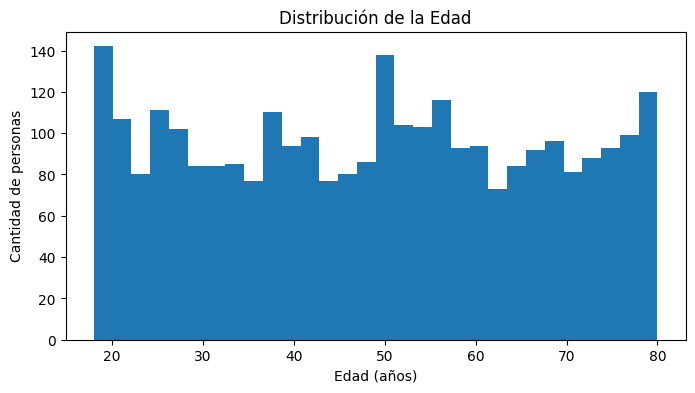

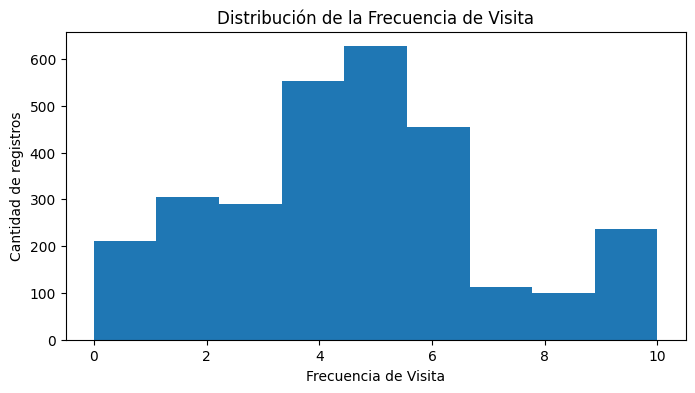

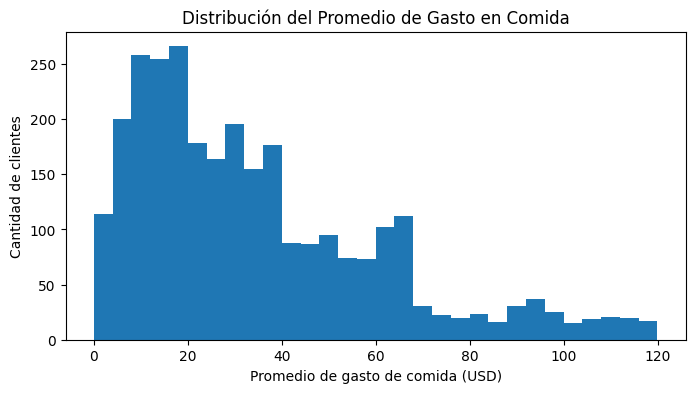

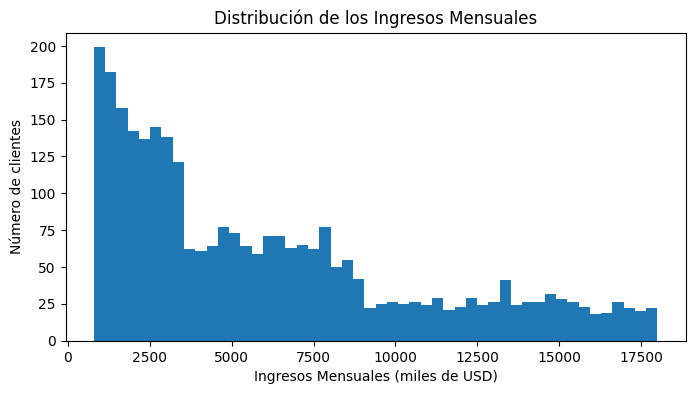

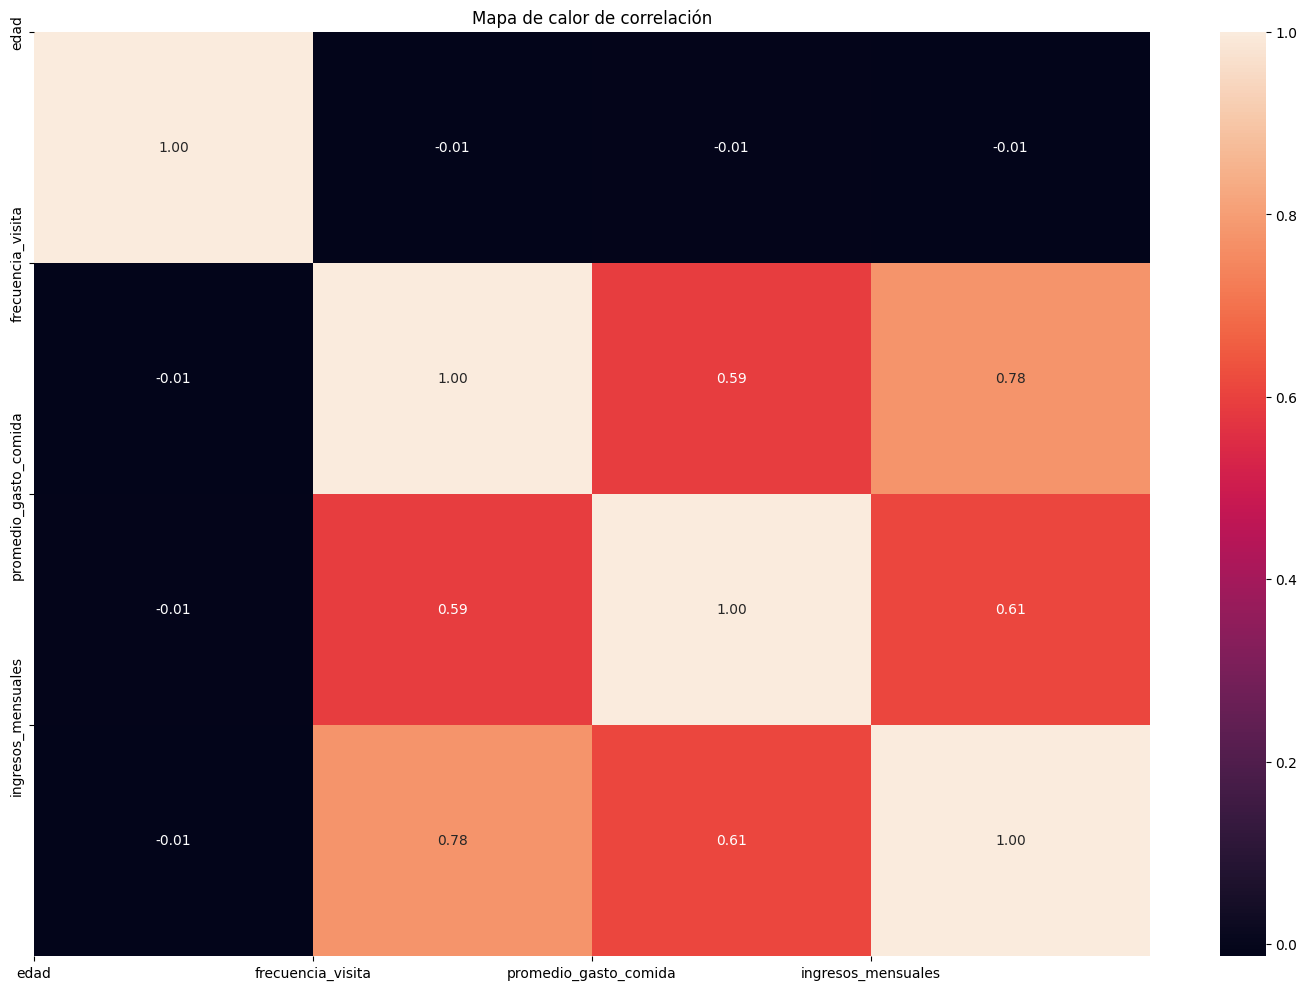

In [49]:
plt.style.use('default') 
# establezco el estilo de los gráficos a usar (default es el estilo por defecto de matplotlib, si este no me gusta puedo probar otros estilos como 'ggplot', 'seaborn', etc.).

# para detectar y diferenciar columnas numéricas y tipo object o categóricas voy a usar:
num_cols = df_limpio.select_dtypes(include=['int64', 'float64']).columns # para las numéricas (int + float).
cat_cols = df_limpio.select_dtypes(include=['object']).columns # para las categóricas (object).
print("Columnas numéricas:", list(num_cols)) # para mostrar las columnas numéricas.
print("Columnas categóricas:", list(cat_cols)) # para mostrar las columnas categóricas.


# procedo a generar histogramas

# Histograma de 'edad'
plt.figure(figsize=(8,4)) # defino el tamaño de la figura (la ajustaré según la necesidad de visualización).
plt.hist(df_limpio['edad'], bins=30) # genero el histograma con 30 bins, es decir, 30 barras o intervalos.
plt.xlabel('Edad (años)')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de la Edad')
plt.show()

# Histograma de Frecuencia de Visita
plt.figure(figsize=(8,4))
plt.hist(df_limpio['frecuencia_visita'], bins=9) # defino 9 bins, considero que esta forma me muestra mejor la distribución de los datos.
plt.xlabel('Frecuencia de Visita')
plt.ylabel('Cantidad de registros')
plt.title('Distribución de la Frecuencia de Visita')
plt.show()

# Histograma de Promedio de Gasto
plt.figure(figsize=(8,4))
plt.hist(df_limpio['promedio_gasto_comida'], bins=30)
plt.xlabel('Promedio de gasto de comida (USD)')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución del Promedio de Gasto en Comida')
plt.show()

# Histograma de Ingresos Mensuales
plt.figure(figsize=(8,4))
plt.hist(df_limpio['ingresos_mensuales'], bins=50)
plt.xlabel('Ingresos Mensuales (miles de USD)')
plt.ylabel('Número de clientes')
plt.title('Distribución de los Ingresos Mensuales')
plt.show()

#colorheatmap o matriz de correlación
plt.figure(figsize=(18,12))
corr = df_limpio[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f") # annot=true me muestra los valores de correlación en cada celda
plt.xticks(range(len(num_cols)), num_cols, rotation=0)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Mapa de calor de correlación")
plt.show()

##### Gráficos de barras para todas columnas categóricas (object):

In [50]:
cat_cols = df_limpio.select_dtypes(include=['object']).columns

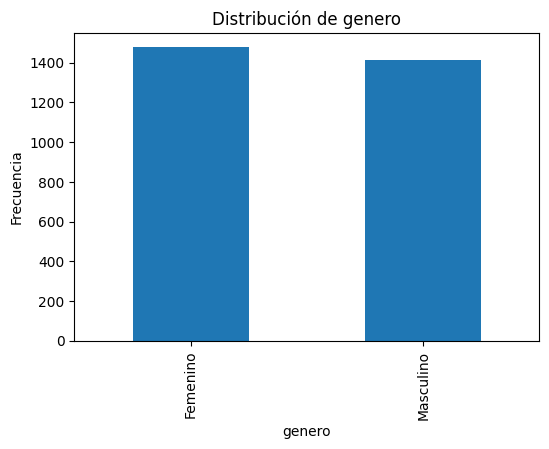

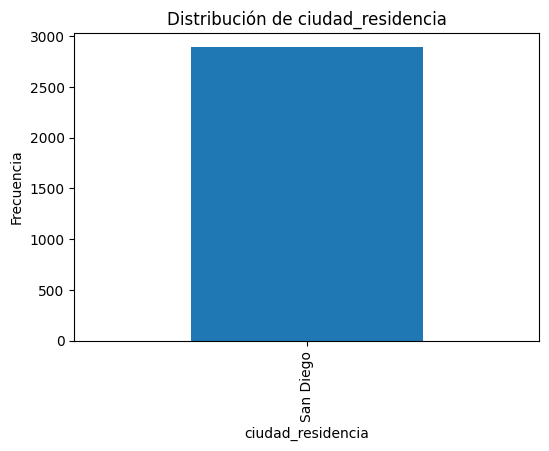

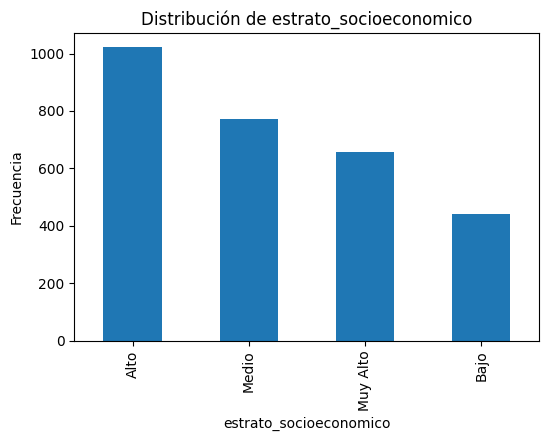

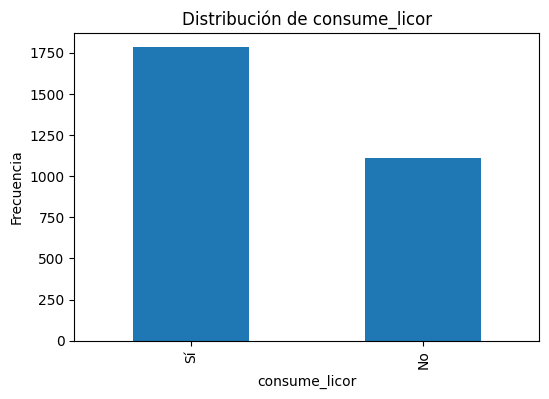

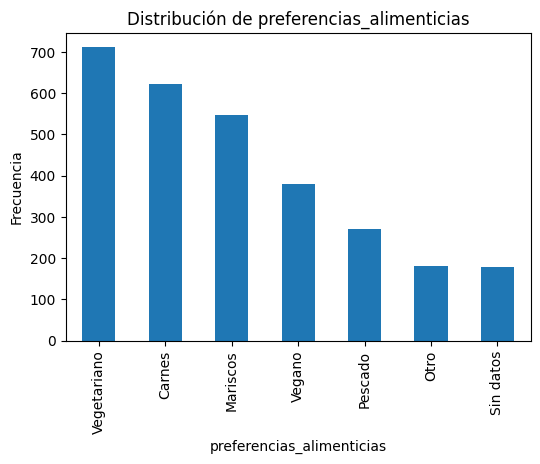

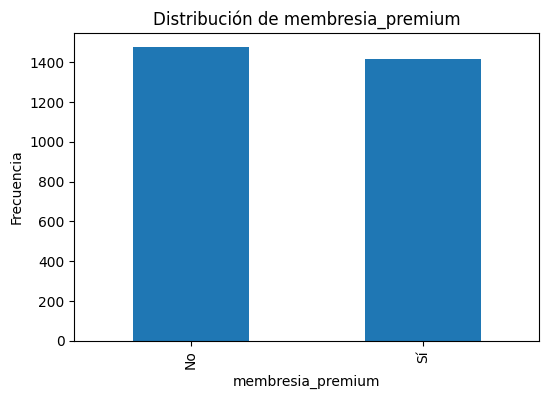

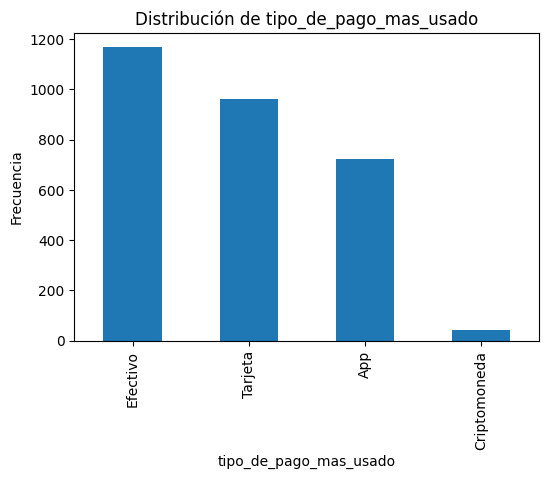

In [51]:
for col in cat_cols: # genero gráficos de barras para cada columna categórica.
    plt.figure(figsize=(6,4)) # defino el tamaño de la figura.
    df_limpio[col].value_counts().plot(kind='bar') # genero el gráfico de barras.
    plt.title(f"Distribución de {col}") # agrego el título del gráfico.
    plt.xlabel(col) # etiqueta del eje x.
    plt.ylabel("Frecuencia") # etiqueta del eje y.
    plt.show() # muestro el gráfico.

##### Genero boxplots para mi df:

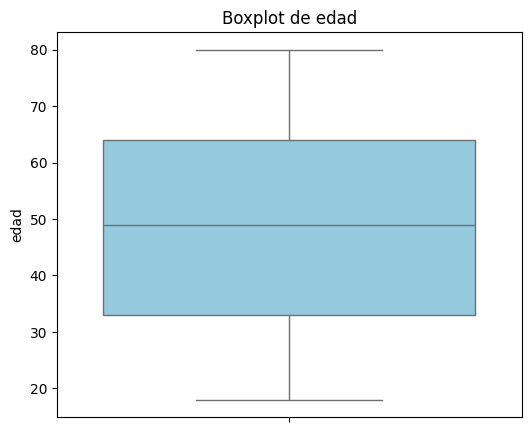

In [52]:
columna_a_graficar = 'edad'

plt.figure(figsize=(6, 5)) # Tamaño de la figura.
sns.boxplot(y=df_limpio[columna_a_graficar], color='skyblue') # genero el boxplot.

plt.title(f'Boxplot de {columna_a_graficar}') # agrego el título del gráfico.
plt.ylabel(columna_a_graficar) # etiqueta del eje y.
plt.show()

###### La demografía es amplia y simétrica. Sin outliers.

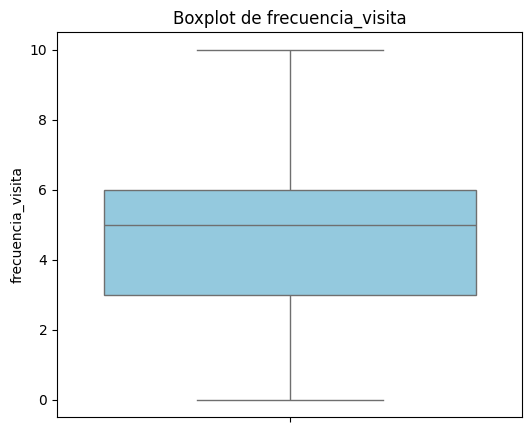

In [53]:
columna_a_graficar = 'frecuencia_visita'

plt.figure(figsize=(6, 5))
sns.boxplot(y=df_limpio[columna_a_graficar], color='skyblue')

plt.title(f'Boxplot de {columna_a_graficar}')
plt.ylabel(columna_a_graficar)
plt.show()

###### La dispersión (IQR está entre 3 y 6 visitas), el valor típico es aprox 5 visitas y no hay outliers.

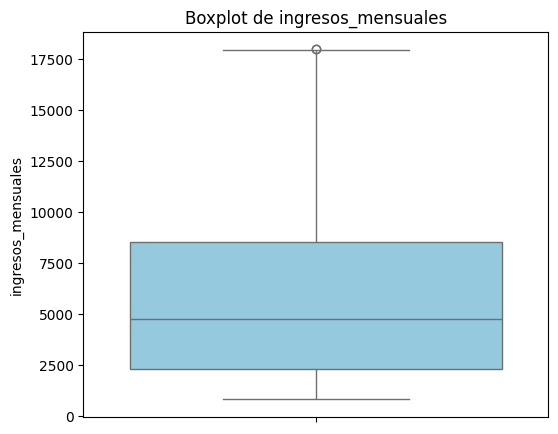

In [54]:
columna_a_graficar = 'ingresos_mensuales'

plt.figure(figsize=(6, 5))
sns.boxplot(y=df_limpio[columna_a_graficar], color='skyblue')

plt.title(f'Boxplot de {columna_a_graficar}')
plt.ylabel(columna_a_graficar)
plt.show()

###### El valor típico está alrededor de los 5 mil dólares. El IQR muestra que el 50 % gana entre 2500 y 8500 dólares con un outlier de altos ingresos que supera los 17500 dólares.

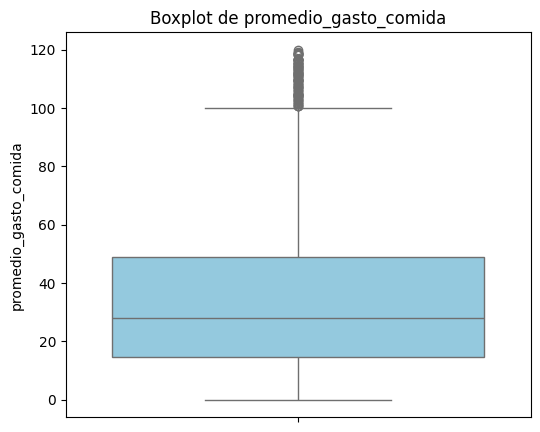

In [55]:
columna_a_graficar = 'promedio_gasto_comida'

plt.figure(figsize=(6, 5))
sns.boxplot(y=df_limpio[columna_a_graficar], color='skyblue')

plt.title(f'Boxplot de {columna_a_graficar}')
plt.ylabel(columna_a_graficar)
plt.show()

###### La dispersión se ubica entre los 15 y los 48 dólares por comida con una mediana aproximada de 30 dólares. Existen muchos outliers que gastan entre 100 y 120 dólares por comida.

### A continuación, tablas cruzadas

##### Género y Preferencias alimenticias:

In [56]:
pd.crosstab(df_limpio['genero'], df_limpio['preferencias_alimenticias'])
# tabla de contingencia entre género y preferencias alimenticias.

preferencias_alimenticias,Carnes,Mariscos,Otro,Pescado,Sin datos,Vegano,Vegetariano
genero,,,,,,,
Femenino,310,284,92,143,97,198,354
Masculino,312,262,89,128,82,183,357


##### Consumidor de licos y Estrato socioeconómico:

In [57]:
pd.crosstab(df_limpio['consume_licor'], df_limpio['estrato_socioeconomico'])

estrato_socioeconomico,Alto,Bajo,Medio,Muy Alto
consume_licor,,,,
No,376,174,303,255
Sí,645,267,469,402


##### Tipo de pago y Membresía premium:

In [58]:
pd.crosstab(df_limpio['tipo_de_pago_mas_usado'], df_limpio['membresia_premium'])

membresia_premium,No,Sí
tipo_de_pago_mas_usado,,
App,391,331
Criptomoneda,22,19
Efectivo,560,608
Tarjeta,501,459


##### Frecuencia de visita y Tipo de pago más usado:

In [59]:
pd.crosstab(df_limpio['frecuencia_visita'], df_limpio['tipo_de_pago_mas_usado'], normalize='index')*100

tipo_de_pago_mas_usado,App,Criptomoneda,Efectivo,Tarjeta
frecuencia_visita,,,,
0,30.701754,1.754386,35.964912,31.578947
1,22.916667,2.083333,38.541667,36.458333
2,27.540984,2.950820,37.377049,32.131148
3,25.172414,0.689655,37.586207,36.551724
4,25.631769,1.263538,40.974729,32.129964
5,24.561404,1.435407,38.277512,35.725678
6,22.857143,1.318681,45.494505,30.329670
7,30.973451,1.769912,34.513274,32.743363
8,24.000000,2.000000,49.000000,25.000000


## Diagramación, listado y gráficos

Distribución por edades

##### Creación de una nueva columna, el Gasto Total Mensual (multiplico el gasto promedio por la frecuencia de visita):

##### Por su utilidad a los gráficos que voy a generar posteriormente, voy a mostrar la distribución etaria de mi df tanto en datos como en datos graficados: 

##### Datos:

In [60]:
print("Edad - media:", np.mean(df_limpio['edad']))
print("Edad - mediana:", np.median(df_limpio['edad']))
print("Edad - desvío estándar:", np.std(df_limpio['edad']))

Edad - media: 48.64579730197163
Edad - mediana: 49.0
Edad - desvío estándar: 18.154790992643942


##### Datos graficados:

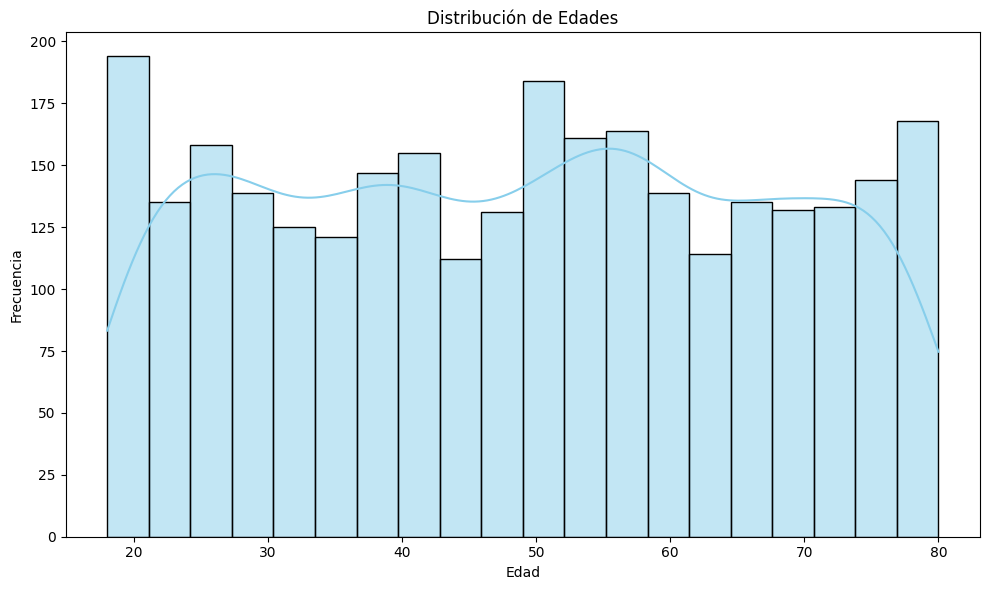

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df_limpio['edad'], bins=20, kde=True, color='skyblue')

plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


###### La distribución es multimodal, es decir, con varios picos y bastante uniforme entre los 20 y los 80 años. Los picos más notables se encuentran cerca de los 20 años y los 50-55 años.

##### 1. Diagrama de cantidad personas por ciudad:

C:\Users\feder\AppData\Local\Temp\ipykernel_1568\2023044041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, # Acá uso df en vez de df_avance3 para traer a todas las ciudades, ya que el segundo está filtrado solamente por la ciudad de San Diego


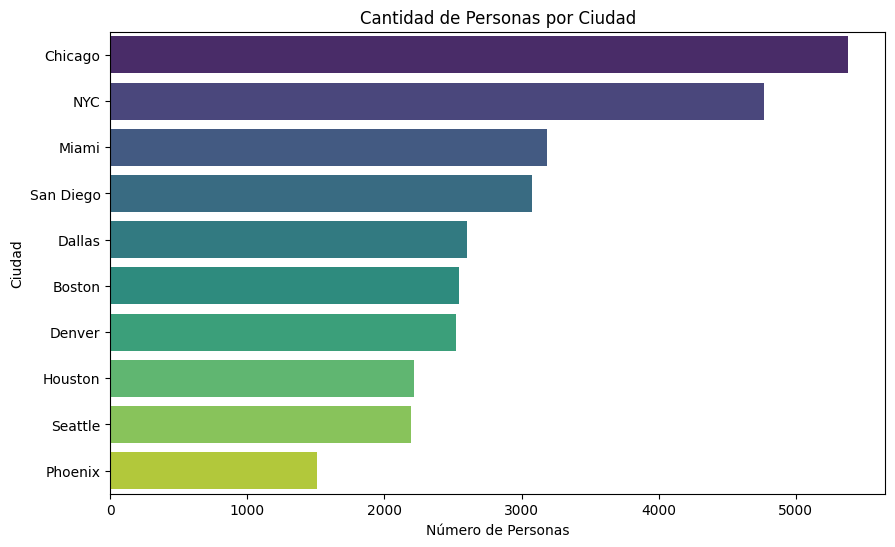

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, # Acá uso df en vez de df_avance3 para traer a todas las ciudades, ya que el segundo está filtrado solamente por la ciudad de San Diego 
              y='ciudad_residencia', 
              palette='viridis', 
              order=df['ciudad_residencia'].value_counts().index)

plt.title('Cantidad de Personas por Ciudad')
plt.xlabel('Número de Personas')
plt.ylabel('Ciudad')
plt.show()

###### Chicago y Nueva York tienen la mayor cantidad de registros (casi 5500 y 4800 registros respectivamente). Phoenix, en cambio, tiene la menor cantidad de registros (poco más de 1500).

##### 2. Listado de distribución por estrato socioeconómico:

a. Como tabla:

In [63]:
df_limpio['estrato_socioeconomico'].value_counts()

estrato_socioeconomico
Alto        1021
Medio        772
Muy Alto     657
Bajo         441
Name: count, dtype: int64

b. En porcentajes:

In [64]:
df_limpio['estrato_socioeconomico'].value_counts(normalize=True) * 100

estrato_socioeconomico
Alto        35.316499
Medio       26.703563
Muy Alto    22.725700
Bajo        15.254237
Name: proportion, dtype: float64

c. Como gráfico:

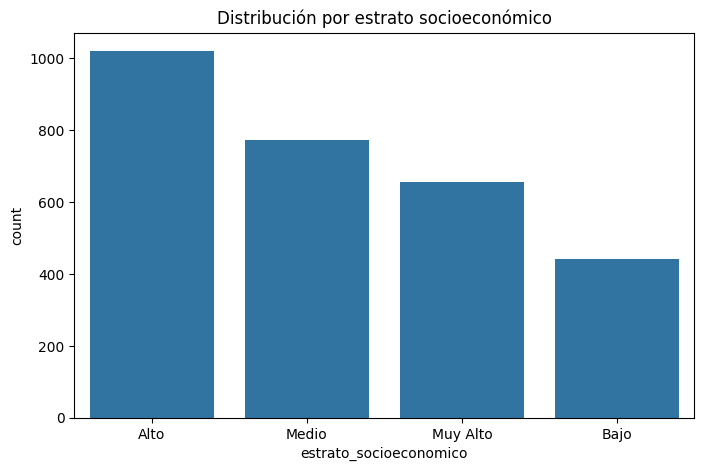

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_limpio, x='estrato_socioeconomico',
              order=df_limpio['estrato_socioeconomico'].value_counts().index)
plt.title('Distribución por estrato socioeconómico')
plt.show()

###### La mayoría de los clientes se concentran en los estratos Alto y Medio. El estrato Muy Alto también tiene una presencia significativa, mientras que el estrato Bajo es el menos representado.

##### 3. Gráfico de ciudades que más dinero gastan en restaurantes por mes:

In [66]:
# Creo la columna gasto mensual total en el dataframe df para luego usarla en un gráfico
df['gasto_mensual_total'] = df['frecuencia_visita'] * df['promedio_gasto_comida']

C:\Users\feder\AppData\Local\Temp\ipykernel_1568\621735266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ranking_gasto, x='gasto_mensual_total', y='ciudad_residencia', palette='magma')


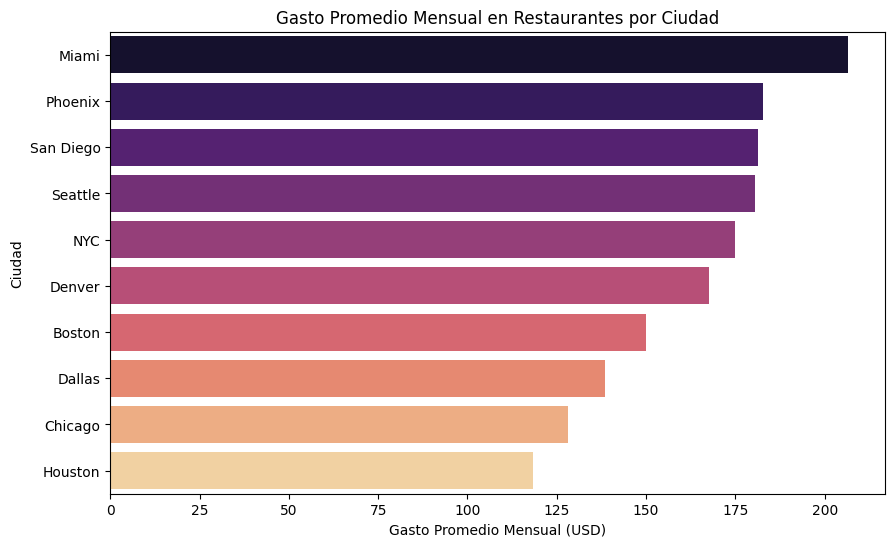

In [67]:
# Agrupamos por ciudad y sacamos el promedio del gasto TOTAL mensual
ranking_gasto = df.groupby('ciudad_residencia')['gasto_mensual_total'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ranking_gasto, x='gasto_mensual_total', y='ciudad_residencia', palette='magma')

plt.title('Gasto Promedio Mensual en Restaurantes por Ciudad')
plt.xlabel('Gasto Promedio Mensual (USD)')
plt.ylabel('Ciudad')
plt.show()

###### Miami es el mercado con el mayor gasto promedio mensual, valor situado arriba de los 200 dólares, seguido de Phoenix y San Diego, ambos alrededor de los 180 dólares. Chicago y Houston son las ciudades con el menor gasto promedio mensual con un aproximado de 130 y 115 dólares respectivamente.

##### 4. Gráfico de la relación entre frecuencia de visita y gasto promedio por comida según el estrato socioeconómico:

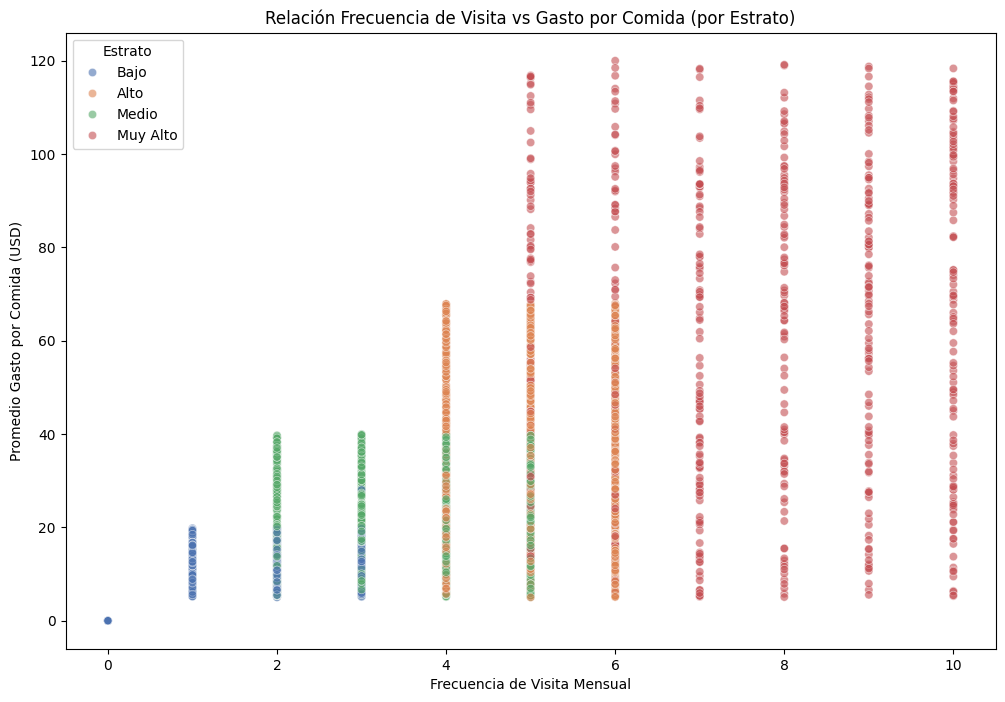

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_limpio, # uso df_limpio ya que es el dataframe limpio y filtrado que no incluye valores erróneos.
                x='frecuencia_visita', 
                y='promedio_gasto_comida', 
                hue='estrato_socioeconomico', # coloreo por estrato.
                alpha=0.6, # transparencia para poder ver mejor el gráfico en caso de acumulación de puntos.
                palette='deep')

plt.title('Relación Frecuencia de Visita vs Gasto por Comida (por Estrato)') # título del gráfico.
plt.xlabel('Frecuencia de Visita Mensual') # etiqueta del eje x.
plt.ylabel('Promedio Gasto por Comida (USD)') # etiqueta del eje y.
plt.legend(title='Estrato') # leyenda para el estrato socioeconómico.
plt.show()

###### El mapa de calor confirma que las tres variables financieras (Ingresos Mensuales, Frecuencia de Visita, y Promedio Gasto por Comida) están fuertemente relacionadas entre sí, creando el perfil de cliente de alto valor.

##### 5. Gráfico de dispersión que muestra la relación entre el gasto promedio mensual de la población y sus ingresos al mes:

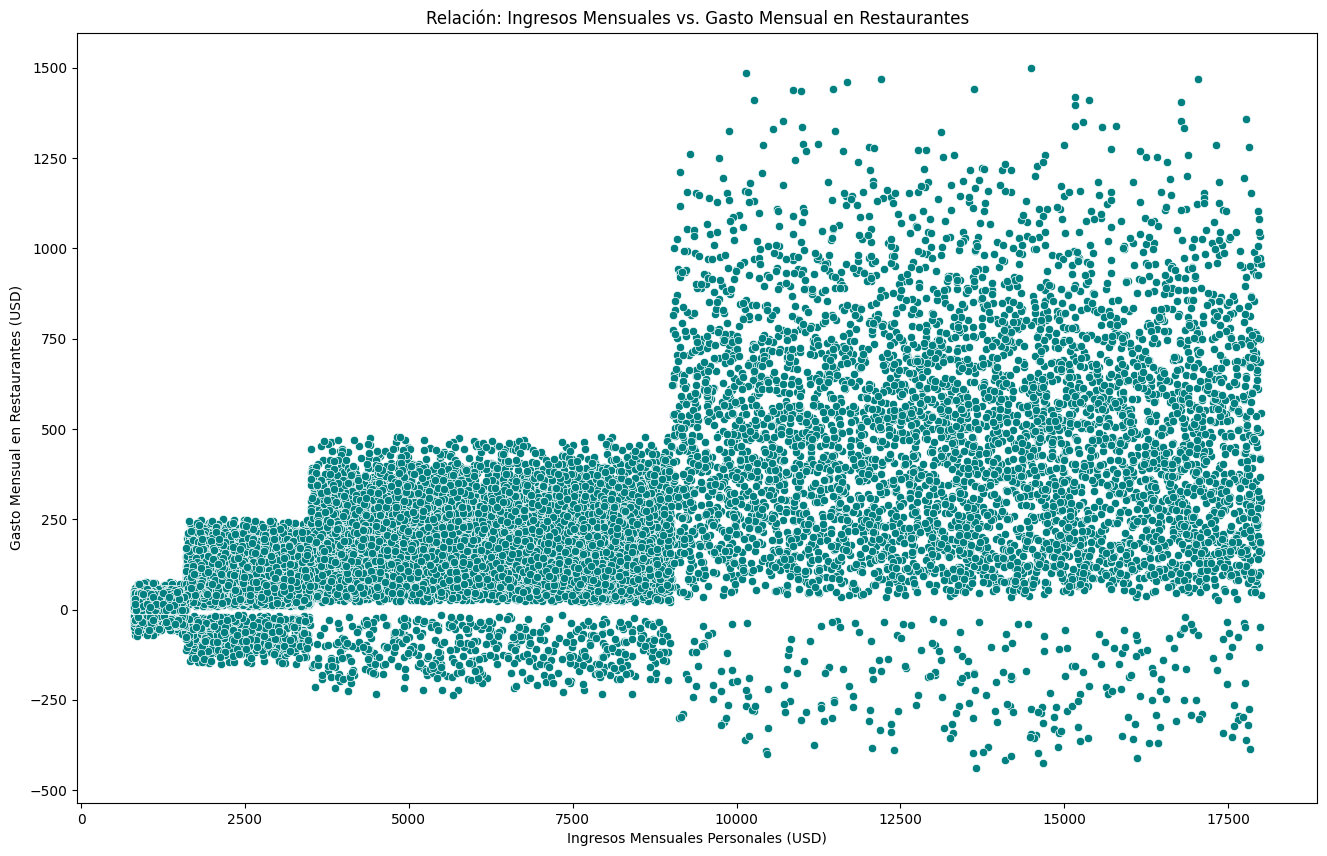

In [69]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df, x='ingresos_mensuales', y='gasto_mensual_total', alpha=1.0, color='teal')
# uso data=df porque quiero ver todos los datos sin filtrar.

plt.title('Relación: Ingresos Mensuales vs. Gasto Mensual en Restaurantes')
plt.xlabel('Ingresos Mensuales Personales (USD)')
plt.ylabel('Gasto Mensual en Restaurantes (USD)')
plt.show()

###### La relación no es gradual, sino que se observa una clara escalada en el gasto que se activa al cruzar ciertos umbrales de ingreso, formando bandas: Banda de Ingresos Bajos (menor a 4000 dólares por mes): El gasto mensual se mantiene en niveles bajos, principalmente concentrado entre 0 y 250 dólares por mes. Banda de Ingresos Medios (entre 4000 y 8000 dólares por mes) El gasto aumenta pero se mantiene por debajo de los 500 dólares mensuales. Banda de Ingresos Altos (mayor a 8000 dólares) El gasto se dispara significativamente, alcanzando el máximo de hasta 1500 dólares por mes. La concentración de puntos en los rangos de gasto más altos, es decir, superiores a los 750 dólares se da casi exclusivamente en este segmento.

##### 6. Distribución de preferencias alimenticias por ciudad:

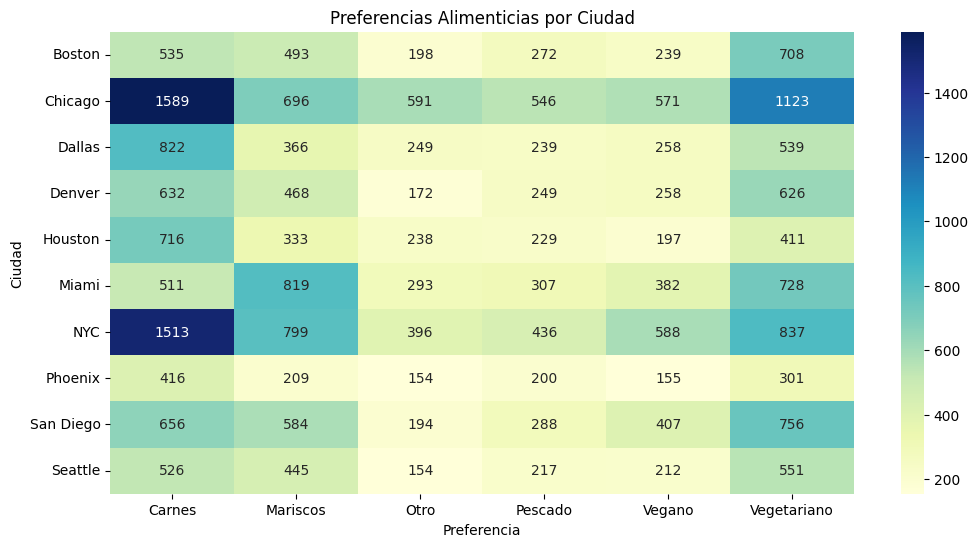

In [70]:
# defino la tabla cruzada entre ciudad de residencia y preferencias alimenticias.
tabla_preferencias = pd.crosstab(df['ciudad_residencia'], df['preferencias_alimenticias'])

plt.figure(figsize=(12, 6))
sns.heatmap(tabla_preferencias, annot=True, fmt='d', cmap='YlGnBu')
# fmt='d' es para números enteros y annot=True me muestra los valores dentro de cada celda mientras que cmap define la paleta de colores.

plt.title('Preferencias Alimenticias por Ciudad')
plt.ylabel('Ciudad')
plt.xlabel('Preferencia')
plt.show()

###### Hallazgo Principal (Dominancia): El consumo de Carnes domina en Chicago (1589) y NYC (1513). De Mariscos domina en Miami (819) y en NYC también (799). El consumo Vegetariano domina en Boston (708), Chicago (1123) y San Diego (756). En nuestro gráfico, son los datos con un color azul más oscuro.

##### 7. Clientes con mayor gasto, preferencias alimenticias y cuánto gastan por mes:

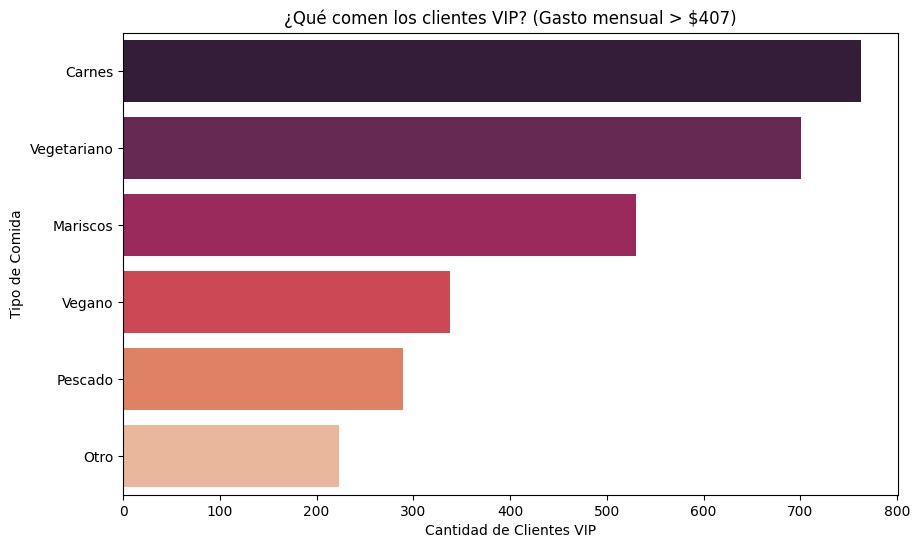

In [71]:
# 1. Definimos quiénes son los que más gastan (Top 10%)
limite_top = df['gasto_mensual_total'].quantile(0.90) # percentil 90 (top 10%).
top_spenders = df[df['gasto_mensual_total'] >= limite_top] # filtramos los que están por encima de ese límite.

# 2. Calculamos sus preferencias
conteo_preferencias = top_spenders['preferencias_alimenticias'].value_counts().reset_index()
# defino conteo_preferencias y cuento las preferencias alimenticias de los que más gastan.
conteo_preferencias.columns = ['Preferencia', 'Cantidad']
# renombro las columnas para mayor claridad.

# 3. Graficamos
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo_preferencias, x='Cantidad', y='Preferencia', hue='Preferencia', palette='rocket', dodge=False, legend=False)

plt.title(f'¿Qué comen los clientes VIP? (Gasto mensual > ${limite_top:.0f})')
plt.xlabel('Cantidad de Clientes VIP')
plt.ylabel('Tipo de Comida')
plt.show()

###### Los clientes VIP se concentran abrumadoramente en el consumo de Carnes (que es el tipo de comida más popular y que coincide con que los clientes de estratos sociales Alto y Muy Alto constituyen a la mayoría de los registros) y en las opciones Vegetariana y Mariscos como segundo y tercer lugar, respectivamente. Sin embargo, el subgrupo Vegetarianos-Veganos, supera al de Carnes.

##### 8. Gráfico de ciudades con más membresías pagas:

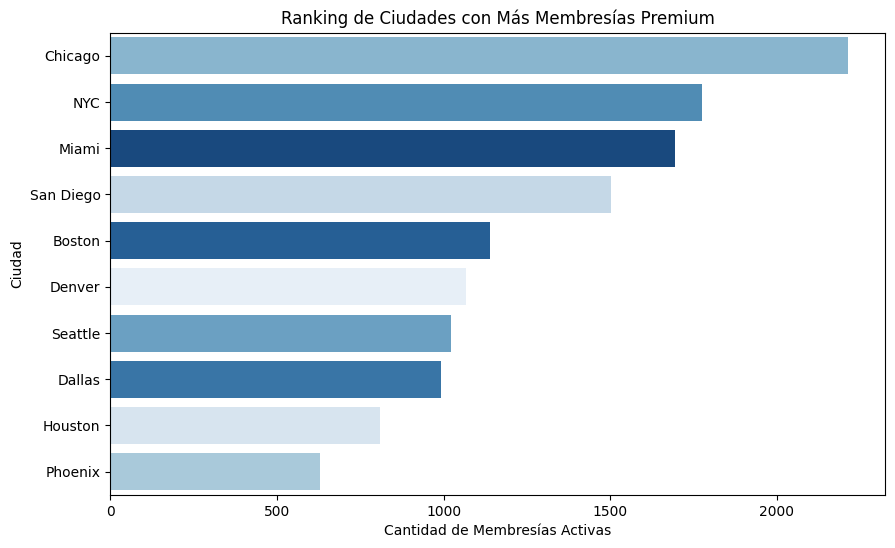

In [72]:
# filtro a los que sí tienen membresía premium.
clientes_con_membresia = df[df['membresia_premium'].str.lower().fillna('no') == 'sí']

plt.figure(figsize=(10, 6))
sns.countplot(data=clientes_con_membresia, # uso data=clientes_con_membresía para traer solo a los que tienen membresía premium.
              y='ciudad_residencia', # uso 'y' para que las ciudades salgan en el eje vertical.
              hue='ciudad_residencia', # coloreo por ciudad.
              
              order=clientes_con_membresia['ciudad_residencia'].value_counts().index, # ordeno las ciudades según la cantidad de membresías de mayor a menor.
              palette='Blues_r', dodge=False) # uso una paleta de azules invertida para mejor visualización. Blues_r es la versión invertida de Blues que va de oscuro a claro.

plt.title('Ranking de Ciudades con Más Membresías Premium')
plt.xlabel('Cantidad de Membresías Activas')
plt.ylabel('Ciudad')
plt.legend([], [], frameon=False) 
plt.show()

###### Chicago es la ciudad con más Membresías Activas (más de 2200).

##### 9. Gráfico de distribución de edad y de consumo de alcohol:

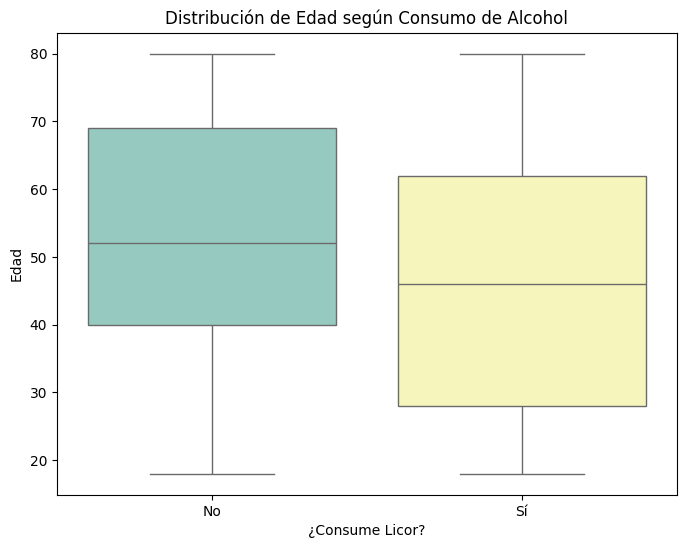

In [73]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df_limpio, x='consume_licor', y='edad', hue='consume_licor', palette='Set3', legend=False)
# uso el df 'df_limpio' para evitar valores erróneos en edad.

plt.title('Distribución de Edad según Consumo de Alcohol')
plt.xlabel('¿Consume Licor?')
plt.ylabel('Edad')
plt.show()

###### Este boxplot compara la edad de los clientes que consumen licor (Sí) frente a los que no (No). Mediana: La mediana de edad es ligeramente más alta para el grupo que NO consume licor (aproximadamente 52 años) que para el grupo que SÍ consume (aproximadamente 46 años). Rango Intercuartil (Caja): El rango central (50% de la población) es más concentrado y alto en el grupo que NO consume (aproximadamente 40 a 69 años) que en el grupo que SÍ consume (aproximadamente 28 a 62 años).

